# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 987654321
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [55 56 62 61 51 57 68 67 65 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [55 56 62 61 51 57 68 67 65 58]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    #print(X_matrix[index].reshape(28,28))
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


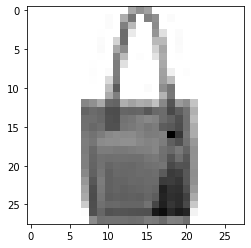

LABEL: 8
INPUT:


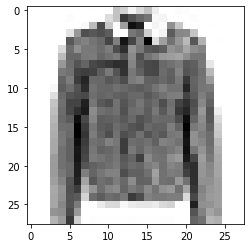

LABEL: 4
INPUT:


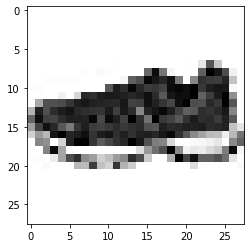

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, verbose=True)

mlp_kfold = GridSearchCV(mlp, parameters, cv=5, return_train_score=True)
mlp_kfold.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_kfold.best_params_)

print("Score with best parameters:")
print(mlp_kfold.best_score_)

print("\nAll scores on the grid:")
print(mlp_kfold.cv_results_['mean_test_score'])

Iteration 1, loss = 2.37373501
Iteration 2, loss = 2.27005446
Iteration 3, loss = 2.12606962
Iteration 4, loss = 1.90690169
Iteration 5, loss = 1.43848640
Iteration 6, loss = 1.15085205
Iteration 7, loss = 1.03204410
Iteration 8, loss = 1.00472584
Iteration 9, loss = 0.94966255
Iteration 10, loss = 0.88171628
Iteration 11, loss = 0.81965556
Iteration 12, loss = 0.79259301
Iteration 13, loss = 0.76721352
Iteration 14, loss = 0.74539978
Iteration 15, loss = 0.70442624
Iteration 16, loss = 0.68731406
Iteration 17, loss = 0.72477136
Iteration 18, loss = 0.69884110
Iteration 19, loss = 0.63559108
Iteration 20, loss = 0.62523541
Iteration 21, loss = 0.64186460
Iteration 22, loss = 0.62121970
Iteration 23, loss = 0.57387075
Iteration 24, loss = 0.55003913
Iteration 25, loss = 0.56327142
Iteration 26, loss = 0.53837167
Iteration 27, loss = 0.52254733
Iteration 28, loss = 0.51943062
Iteration 29, loss = 0.50234694
Iteration 30, loss = 0.48374772
Iteration 31, loss = 0.46108576
Iteration 32, los

Iteration 66, loss = 0.29701535
Iteration 67, loss = 0.28141757
Iteration 68, loss = 0.27179634
Iteration 69, loss = 0.25083216
Iteration 70, loss = 0.26697008
Iteration 71, loss = 0.27084920
Iteration 72, loss = 0.23338260
Iteration 73, loss = 0.24377207
Iteration 74, loss = 0.23256384
Iteration 75, loss = 0.23322004
Iteration 76, loss = 0.22618786
Iteration 77, loss = 0.23591137
Iteration 78, loss = 0.21681478
Iteration 79, loss = 0.22171348
Iteration 80, loss = 0.21146329
Iteration 81, loss = 0.25635220
Iteration 82, loss = 0.20399633
Iteration 83, loss = 0.20389775
Iteration 84, loss = 0.22659327
Iteration 85, loss = 0.20120551
Iteration 86, loss = 0.22923580
Iteration 87, loss = 0.22343075
Iteration 88, loss = 0.19800179
Iteration 89, loss = 0.17940040
Iteration 90, loss = 0.22327774
Iteration 91, loss = 0.18418272
Iteration 92, loss = 0.17451525
Iteration 93, loss = 0.16907080
Iteration 94, loss = 0.18492090
Iteration 95, loss = 0.16921114
Iteration 96, loss = 0.17247311
Iteratio

Iteration 23, loss = 0.56395070
Iteration 24, loss = 0.56110262
Iteration 25, loss = 0.51771178
Iteration 26, loss = 0.50521061
Iteration 27, loss = 0.55078584
Iteration 28, loss = 0.54097161
Iteration 29, loss = 0.46276658
Iteration 30, loss = 0.50114068
Iteration 31, loss = 0.44299635
Iteration 32, loss = 0.43028733
Iteration 33, loss = 0.42609010
Iteration 34, loss = 0.41145286
Iteration 35, loss = 0.41454105
Iteration 36, loss = 0.38999480
Iteration 37, loss = 0.37736586
Iteration 38, loss = 0.37070580
Iteration 39, loss = 0.36707294
Iteration 40, loss = 0.36395652
Iteration 41, loss = 0.35293732
Iteration 42, loss = 0.35278013
Iteration 43, loss = 0.35682875
Iteration 44, loss = 0.32660088
Iteration 45, loss = 0.31267225
Iteration 46, loss = 0.31188681
Iteration 47, loss = 0.29986265
Iteration 48, loss = 0.29300541
Iteration 49, loss = 0.29575641
Iteration 50, loss = 0.28321070
Iteration 51, loss = 0.27883265
Iteration 52, loss = 0.27114636
Iteration 53, loss = 0.27127013
Iteratio

/home/giulia/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 0.56939478
Iteration 13, loss = 0.56707561
Iteration 14, loss = 0.50768655
Iteration 15, loss = 0.56818070
Iteration 16, loss = 0.47001224
Iteration 17, loss = 0.41470299
Iteration 18, loss = 0.36982375
Iteration 19, loss = 0.36364420
Iteration 20, loss = 0.37355661
Iteration 21, loss = 0.31232728
Iteration 22, loss = 0.30384215
Iteration 23, loss = 0.30460874
Iteration 24, loss = 0.27929509
Iteration 25, loss = 0.29073750
Iteration 26, loss = 0.43877987
Iteration 27, loss = 0.25692843
Iteration 28, loss = 0.21911601
Iteration 29, loss = 0.22232179
Iteration 30, loss = 0.20280811
Iteration 31, loss = 0.19585110
Iteration 32, loss = 0.30462750
Iteration 33, loss = 0.21642017
Iteration 34, loss = 0.16793187
Iteration 35, loss = 0.14440923
Iteration 36, loss = 0.22301622
Iteration 37, loss = 0.14383901
Iteration 38, loss = 0.15610318
Iteration 39, loss = 0.25073911
Iteration 40, loss = 0.12615164
Iteration 41, loss = 0.18173857
Iteration 42, loss = 0.12984941
Iteratio

Iteration 121, loss = 0.00779510
Iteration 122, loss = 0.00758270
Iteration 123, loss = 0.00741446
Iteration 124, loss = 0.00729630
Iteration 125, loss = 0.00724013
Iteration 126, loss = 0.00708977
Iteration 127, loss = 0.00696009
Iteration 128, loss = 0.00688055
Iteration 129, loss = 0.00679582
Iteration 130, loss = 0.00669981
Iteration 131, loss = 0.00660534
Iteration 132, loss = 0.00651249
Iteration 133, loss = 0.00642489
Iteration 134, loss = 0.00626617
Iteration 135, loss = 0.00614912
Iteration 136, loss = 0.00610972
Iteration 137, loss = 0.00606346
Iteration 138, loss = 0.00595369
Iteration 139, loss = 0.00585179
Iteration 140, loss = 0.00576008
Iteration 141, loss = 0.00575876
Iteration 142, loss = 0.00571438
Iteration 143, loss = 0.00554341
Iteration 144, loss = 0.00549098
Iteration 145, loss = 0.00538984
Iteration 146, loss = 0.00531904
Iteration 147, loss = 0.00531532
Iteration 148, loss = 0.00521927
Iteration 149, loss = 0.00522365
Iteration 150, loss = 0.00509106
Iteration 

Iteration 48, loss = 0.14866095
Iteration 49, loss = 0.09733716
Iteration 50, loss = 0.07308870
Iteration 51, loss = 0.06367296
Iteration 52, loss = 0.06110236
Iteration 53, loss = 0.26857033
Iteration 54, loss = 0.07074640
Iteration 55, loss = 0.06854285
Iteration 56, loss = 0.05761112
Iteration 57, loss = 0.18872029
Iteration 58, loss = 0.16354243
Iteration 59, loss = 0.05893290
Iteration 60, loss = 0.06447639
Iteration 61, loss = 0.04150231
Iteration 62, loss = 0.03529994
Iteration 63, loss = 0.02874468
Iteration 64, loss = 0.02807695
Iteration 65, loss = 0.02734076
Iteration 66, loss = 0.02430271
Iteration 67, loss = 0.02394973
Iteration 68, loss = 0.02179135
Iteration 69, loss = 0.02328081
Iteration 70, loss = 0.01886615
Iteration 71, loss = 0.01777300
Iteration 72, loss = 0.01733027
Iteration 73, loss = 0.01638286
Iteration 74, loss = 0.01628020
Iteration 75, loss = 0.01572539
Iteration 76, loss = 0.01452519
Iteration 77, loss = 0.01415941
Iteration 78, loss = 0.01335846
Iteratio

Iteration 5, loss = 0.83901299
Iteration 6, loss = 0.74998285
Iteration 7, loss = 0.68667998
Iteration 8, loss = 0.68335271
Iteration 9, loss = 0.62336100
Iteration 10, loss = 0.56570747
Iteration 11, loss = 0.55338471
Iteration 12, loss = 0.47903644
Iteration 13, loss = 0.45258806
Iteration 14, loss = 0.42137291
Iteration 15, loss = 0.40490164
Iteration 16, loss = 0.38374857
Iteration 17, loss = 0.78299854
Iteration 18, loss = 0.41154219
Iteration 19, loss = 0.36828479
Iteration 20, loss = 0.34422972
Iteration 21, loss = 0.37637079
Iteration 22, loss = 0.38590719
Iteration 23, loss = 0.30532694
Iteration 24, loss = 0.26075401
Iteration 25, loss = 0.24408673
Iteration 26, loss = 0.24266983
Iteration 27, loss = 0.37144411
Iteration 28, loss = 0.30045708
Iteration 29, loss = 0.38914540
Iteration 30, loss = 0.21440879
Iteration 31, loss = 0.19049327
Iteration 32, loss = 0.21173497
Iteration 33, loss = 0.17839190
Iteration 34, loss = 0.16557689
Iteration 35, loss = 0.17775602
Iteration 36,

Iteration 112, loss = 0.00621256
Iteration 113, loss = 0.00605259
Iteration 114, loss = 0.00576394
Iteration 115, loss = 0.00569658
Iteration 116, loss = 0.00566304
Iteration 117, loss = 0.00550276
Iteration 118, loss = 0.00543955
Iteration 119, loss = 0.00536034
Iteration 120, loss = 0.00532569
Iteration 121, loss = 0.00522370
Iteration 122, loss = 0.00519043
Iteration 123, loss = 0.00512822
Iteration 124, loss = 0.00514564
Iteration 125, loss = 0.00492619
Iteration 126, loss = 0.00494332
Iteration 127, loss = 0.00486799
Iteration 128, loss = 0.00477057
Iteration 129, loss = 0.00471337
Iteration 130, loss = 0.00468324
Iteration 131, loss = 0.00464793
Iteration 132, loss = 0.00456722
Iteration 133, loss = 0.00447479
Iteration 134, loss = 0.00441875
Iteration 135, loss = 0.00441111
Iteration 136, loss = 0.00431252
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.23917861
Iteration 2, loss = 1.72166456
Iteration 3, loss = 2.5

Iteration 86, loss = 0.00831591
Iteration 87, loss = 0.00817723
Iteration 88, loss = 0.00805836
Iteration 89, loss = 0.00819018
Iteration 90, loss = 0.00811529
Iteration 91, loss = 0.00751088
Iteration 92, loss = 0.00737009
Iteration 93, loss = 0.00727087
Iteration 94, loss = 0.00719664
Iteration 95, loss = 0.00692513
Iteration 96, loss = 0.00682182
Iteration 97, loss = 0.00674640
Iteration 98, loss = 0.00656926
Iteration 99, loss = 0.00649497
Iteration 100, loss = 0.00643487
Iteration 101, loss = 0.00642725
Iteration 102, loss = 0.00615046
Iteration 103, loss = 0.00599282
Iteration 104, loss = 0.00589192
Iteration 105, loss = 0.00594209
Iteration 106, loss = 0.00582220
Iteration 107, loss = 0.00566944
Iteration 108, loss = 0.00554968
Iteration 109, loss = 0.00554116
Iteration 110, loss = 0.00543867
Iteration 111, loss = 0.00534622
Iteration 112, loss = 0.00522285
Iteration 113, loss = 0.00522463
Iteration 114, loss = 0.00514604
Iteration 115, loss = 0.00502409
Iteration 116, loss = 0.

Iteration 2, loss = 2.18704279
Iteration 3, loss = 2.03610258
Iteration 4, loss = 1.66543926
Iteration 5, loss = 1.49365075
Iteration 6, loss = 2.25773322
Iteration 7, loss = 1.57829047
Iteration 8, loss = 1.24922661
Iteration 9, loss = 1.02351679
Iteration 10, loss = 0.92064533
Iteration 11, loss = 0.94343738
Iteration 12, loss = 0.88656467
Iteration 13, loss = 0.96937360
Iteration 14, loss = 0.67594963
Iteration 15, loss = 0.64213699
Iteration 16, loss = 0.60577182
Iteration 17, loss = 0.59112006
Iteration 18, loss = 0.51747395
Iteration 19, loss = 0.47897530
Iteration 20, loss = 0.46034033
Iteration 21, loss = 0.44603143
Iteration 22, loss = 0.74649878
Iteration 23, loss = 0.46720651
Iteration 24, loss = 0.40937417
Iteration 25, loss = 0.37071176
Iteration 26, loss = 0.36018423
Iteration 27, loss = 0.41152108
Iteration 28, loss = 0.33321619
Iteration 29, loss = 0.35502738
Iteration 30, loss = 0.42847742
Iteration 31, loss = 0.39507966
Iteration 32, loss = 0.28130538
Iteration 33, lo

Iteration 29, loss = 0.57010232
Iteration 30, loss = 0.55666730
Iteration 31, loss = 0.54095995
Iteration 32, loss = 0.53825205
Iteration 33, loss = 0.54381753
Iteration 34, loss = 0.48639403
Iteration 35, loss = 0.48771569
Iteration 36, loss = 0.58772693
Iteration 37, loss = 0.50467840
Iteration 38, loss = 0.42494546
Iteration 39, loss = 0.39474382
Iteration 40, loss = 0.37564814
Iteration 41, loss = 0.93012233
Iteration 42, loss = 0.76380376
Iteration 43, loss = 0.49418678
Iteration 44, loss = 0.42028700
Iteration 45, loss = 0.39306650
Iteration 46, loss = 0.41479567
Iteration 47, loss = 0.42483058
Iteration 48, loss = 0.34374343
Iteration 49, loss = 0.34215791
Iteration 50, loss = 0.36777215
Iteration 51, loss = 0.32847960
Iteration 52, loss = 0.33679599
Iteration 53, loss = 0.29256201
Iteration 54, loss = 0.36218946
Iteration 55, loss = 0.46171987
Iteration 56, loss = 0.30571140
Iteration 57, loss = 0.39140873
Iteration 58, loss = 0.33215053
Iteration 59, loss = 0.29125520
Iteratio

Iteration 27, loss = 0.59928144
Iteration 28, loss = 0.51219334
Iteration 29, loss = 0.46423577
Iteration 30, loss = 0.45184121
Iteration 31, loss = 0.39158915
Iteration 32, loss = 0.38553387
Iteration 33, loss = 0.76277872
Iteration 34, loss = 0.76630198
Iteration 35, loss = 0.53922896
Iteration 36, loss = 0.44921793
Iteration 37, loss = 0.41921034
Iteration 38, loss = 0.38874892
Iteration 39, loss = 0.37497836
Iteration 40, loss = 0.34269084
Iteration 41, loss = 0.33006944
Iteration 42, loss = 0.38295259
Iteration 43, loss = 0.33710289
Iteration 44, loss = 0.81639637
Iteration 45, loss = 16.80634023
Iteration 46, loss = 20.69066711
Iteration 47, loss = 2.81225376
Iteration 48, loss = 2.54295907
Iteration 49, loss = 2.43216884
Iteration 50, loss = 2.38947613
Iteration 51, loss = 2.35391769
Iteration 52, loss = 2.32556219
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.20485345
Iteration 2, loss = 1.62051344
Iteration 3, l

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1,32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE
#parameters.update(mlp_kfold.best_params_)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

#ADD YOUR CODE
mlp_kfold_batch = GridSearchCV(mlp_kfold.best_estimator_, parameters, cv=kf, return_train_score=True, verbose=True)
mlp_kfold_batch.fit(X_train, y_train)
#mlp_kfold_batch.score(X_test, y_test)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_kfold_batch.best_params_)

print("Score with best parameters:")
print(mlp_kfold_batch.best_score_)

print("\nAll scores on the grid:")
print(mlp_kfold_batch.cv_results_['mean_test_score'])

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 7.22823824
Iteration 2, loss = 6.78953663
Iteration 3, loss = 6.38841166
Iteration 4, loss = 6.02593414
Iteration 5, loss = 5.70610607
Iteration 6, loss = 5.40698610
Iteration 7, loss = 5.13075197
Iteration 8, loss = 4.89486985
Iteration 9, loss = 4.66997669
Iteration 10, loss = 4.49007721
Iteration 11, loss = 4.30769876
Iteration 12, loss = 4.11209874
Iteration 13, loss = 4.00713857
Iteration 14, loss = 3.84883153
Iteration 15, loss = 3.78276618
Iteration 16, loss = 3.63390220
Iteration 17, loss = 3.54051108
Iteration 18, loss = 3.46488105
Iteration 19, loss = 3.36661845
Iteration 20, loss = 3.28931136
Iteration 21, loss = 3.22701227
Iteration 22, loss = 3.16085562
Iteration 23, loss = 3.09575550
Iteration 24, loss = 3.04204729
Iteration 25, loss = 2.98161382
Iteration 26, loss = 2.95395017
Iteration 27, loss = 2.92405484
Iteration 28, loss = 2.85267819
Iteration 29, loss = 2.84313786
Iteration 30, loss = 2.78894148
Iteration 31, loss = 2.78858016
Iteration 32, los

Iteration 34, loss = 2.53056351
Iteration 35, loss = 2.54183092
Iteration 36, loss = 2.52550714
Iteration 37, loss = 2.50495490
Iteration 38, loss = 2.51893606
Iteration 39, loss = 2.48644027
Iteration 40, loss = 2.56345381
Iteration 41, loss = 2.52899212
Iteration 42, loss = 2.51182937
Iteration 43, loss = 2.54416600
Iteration 44, loss = 2.51374971
Iteration 45, loss = 2.52413806
Iteration 46, loss = 2.52196076
Iteration 47, loss = 2.54333997
Iteration 48, loss = 2.51525153
Iteration 49, loss = 2.53038329
Iteration 50, loss = 2.51564213
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.82436858
Iteration 2, loss = 1.07105829
Iteration 3, loss = 0.85228112
Iteration 4, loss = 0.67882213
Iteration 5, loss = 0.70808230
Iteration 6, loss = 0.63922619
Iteration 7, loss = 0.74575030
Iteration 8, loss = 0.76220515
Iteration 9, loss = 0.59764238
Iteration 10, loss = 0.50681014
Iteration 11, loss = 0.52129871
Iteration 12, loss = 0.

Iteration 3, loss = 0.74458831
Iteration 4, loss = 0.65886188
Iteration 5, loss = 0.54851962
Iteration 6, loss = 0.49332512
Iteration 7, loss = 0.46579286
Iteration 8, loss = 0.47755855
Iteration 9, loss = 0.36658944
Iteration 10, loss = 0.34110439
Iteration 11, loss = 0.33424070
Iteration 12, loss = 0.39554412
Iteration 13, loss = 0.32045001
Iteration 14, loss = 0.31869883
Iteration 15, loss = 0.31235478
Iteration 16, loss = 0.29424421
Iteration 17, loss = 0.27510943
Iteration 18, loss = 0.27850017
Iteration 19, loss = 0.24720496
Iteration 20, loss = 0.18992057
Iteration 21, loss = 0.17297149
Iteration 22, loss = 0.16182664
Iteration 23, loss = 0.88167858
Iteration 24, loss = 0.74513600
Iteration 25, loss = 0.56793784
Iteration 26, loss = 0.51751022
Iteration 27, loss = 0.42577265
Iteration 28, loss = 0.39521140
Iteration 29, loss = 0.39152324
Iteration 30, loss = 0.38171299
Iteration 31, loss = 0.35821428
Iteration 32, loss = 0.34533698
Iteration 33, loss = 0.32352109
Training loss d

Iteration 106, loss = 0.08066051
Iteration 107, loss = 0.07896727
Iteration 108, loss = 0.07745968
Iteration 109, loss = 0.07626704
Iteration 110, loss = 0.07528423
Iteration 111, loss = 0.07475322
Iteration 112, loss = 0.07469229
Iteration 113, loss = 0.07551365
Iteration 114, loss = 0.07701332
Iteration 115, loss = 0.08092336
Iteration 116, loss = 0.08720354
Iteration 117, loss = 0.10274194
Iteration 118, loss = 0.13064736
Iteration 119, loss = 0.21651633
Iteration 120, loss = 0.37334208
Iteration 121, loss = 0.56698862
Iteration 122, loss = 0.52750582
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 2.36183547
Iteration 2, loss = 2.18680129
Iteration 3, loss = 2.00965333
Iteration 4, loss = 1.80425219
Iteration 5, loss = 1.58666664
Iteration 6, loss = 1.37816626
Iteration 7, loss = 1.19838573
Iteration 8, loss = 1.12109615
Iteration 9, loss = 1.36526104
Iteration 10, loss = 2.09191263
Iteration 11, loss = 1.39118190
Iterat

Iteration 14, loss = 0.80028632
Iteration 15, loss = 0.73239205
Iteration 16, loss = 0.71002662
Iteration 17, loss = 0.68889077
Iteration 18, loss = 0.65479904
Iteration 19, loss = 0.62711664
Iteration 20, loss = 0.60360077
Iteration 21, loss = 0.58267065
Iteration 22, loss = 0.56377543
Iteration 23, loss = 0.54634641
Iteration 24, loss = 0.53001510
Iteration 25, loss = 0.51431788
Iteration 26, loss = 0.49930944
Iteration 27, loss = 0.48478312
Iteration 28, loss = 0.47085324
Iteration 29, loss = 0.45741998
Iteration 30, loss = 0.44440415
Iteration 31, loss = 0.43176761
Iteration 32, loss = 0.41958697
Iteration 33, loss = 0.40784153
Iteration 34, loss = 0.39658140
Iteration 35, loss = 0.38606082
Iteration 36, loss = 0.37758144
Iteration 37, loss = 0.37813231
Iteration 38, loss = 0.41504559
Iteration 39, loss = 0.61120381
Iteration 40, loss = 0.70221793
Iteration 41, loss = 0.70225404
Iteration 42, loss = 0.40867730
Iteration 43, loss = 0.34276117
Iteration 44, loss = 0.33620150
Iteratio

Iteration 158, loss = 0.03017269
Iteration 159, loss = 0.02966346
Iteration 160, loss = 0.02917215
Iteration 161, loss = 0.02868404
Iteration 162, loss = 0.02821463
Iteration 163, loss = 0.02775668
Iteration 164, loss = 0.02731160
Iteration 165, loss = 0.02687930
Iteration 166, loss = 0.02645599
Iteration 167, loss = 0.02604329
Iteration 168, loss = 0.02563706
Iteration 169, loss = 0.02524648
Iteration 170, loss = 0.02486550
Iteration 171, loss = 0.02448964
Iteration 172, loss = 0.02412660
Iteration 173, loss = 0.02377276
Iteration 174, loss = 0.02342632
Iteration 175, loss = 0.02308717
Iteration 176, loss = 0.02275829
Iteration 177, loss = 0.02243924
Iteration 178, loss = 0.02212199
Iteration 179, loss = 0.02181667
Iteration 180, loss = 0.02151446
Iteration 181, loss = 0.02122057
Iteration 182, loss = 0.02093772
Iteration 183, loss = 0.02065347
Iteration 184, loss = 0.02038057
Iteration 185, loss = 0.02011447
Iteration 186, loss = 0.01984934
Iteration 187, loss = 0.01959496
Iteration 

Iteration 172, loss = 0.02009583
Iteration 173, loss = 0.01983616
Iteration 174, loss = 0.01956375
Iteration 175, loss = 0.01930602
Iteration 176, loss = 0.01905931
Iteration 177, loss = 0.01881471
Iteration 178, loss = 0.01857923
Iteration 179, loss = 0.01835495
Iteration 180, loss = 0.01812586
Iteration 181, loss = 0.01790222
Iteration 182, loss = 0.01768267
Iteration 183, loss = 0.01747523
Iteration 184, loss = 0.01727246
Iteration 185, loss = 0.01706420
Iteration 186, loss = 0.01686844
Iteration 187, loss = 0.01666820
Iteration 188, loss = 0.01648056
Iteration 189, loss = 0.01629814
Iteration 190, loss = 0.01611110
Iteration 191, loss = 0.01592874
Iteration 192, loss = 0.01575479
Iteration 193, loss = 0.01558463
Iteration 194, loss = 0.01542290
Iteration 195, loss = 0.01525043
Iteration 196, loss = 0.01508932
Iteration 197, loss = 0.01492710
Iteration 198, loss = 0.01477074
Iteration 199, loss = 0.01462300
Iteration 200, loss = 0.01447114
Iteration 201, loss = 0.01432374
Iteration 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.7min finished


Iteration 4, loss = 1.37117934
Iteration 5, loss = 1.34924124
Iteration 6, loss = 1.19630673
Iteration 7, loss = 0.95599480
Iteration 8, loss = 0.74890833
Iteration 9, loss = 0.75256401
Iteration 10, loss = 0.75506096
Iteration 11, loss = 0.63115578
Iteration 12, loss = 0.68642097
Iteration 13, loss = 0.58672869
Iteration 14, loss = 0.57074384
Iteration 15, loss = 0.57889236
Iteration 16, loss = 0.53305251
Iteration 17, loss = 0.53576294
Iteration 18, loss = 0.48046269
Iteration 19, loss = 0.47154722
Iteration 20, loss = 0.46451914
Iteration 21, loss = 0.48091467
Iteration 22, loss = 0.44566212
Iteration 23, loss = 0.40889144
Iteration 24, loss = 0.39389645
Iteration 25, loss = 0.47869172
Iteration 26, loss = 0.38591744
Iteration 27, loss = 0.35246264
Iteration 28, loss = 0.33539610
Iteration 29, loss = 0.32369078
Iteration 30, loss = 0.40196540
Iteration 31, loss = 0.39611063
Iteration 32, loss = 0.29047479
Iteration 33, loss = 0.30375363
Iteration 34, loss = 0.34274974
Iteration 35, 

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?


## [ANSWER TO QUESTION 1]

As far as the seed I considered is concerned the algorithm does not converge for a one hidden-layer NN of size 10, this could be caused by underfitting. For more complex NN there are no convergence issue but the algorithm stops after few iterations since there is no improvement  bigger than tolerance.
I get convergence for each batch size (tried also with batch size of 64 and still get convergence).
What I notice is that for small batch size the algorithm stops after few iterations due to no improvement bigger than tolerance, since for small batch size the algorithm is less robust.


### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 2.96 sec

Training MLP of size (20,) ...
Done, training time: 2.42 sec

Training MLP of size (30,) ...
Done, training time: 2.66 sec

Training MLP of size (30, 20) ...
Done, training time: 1.88 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 1.17 sec



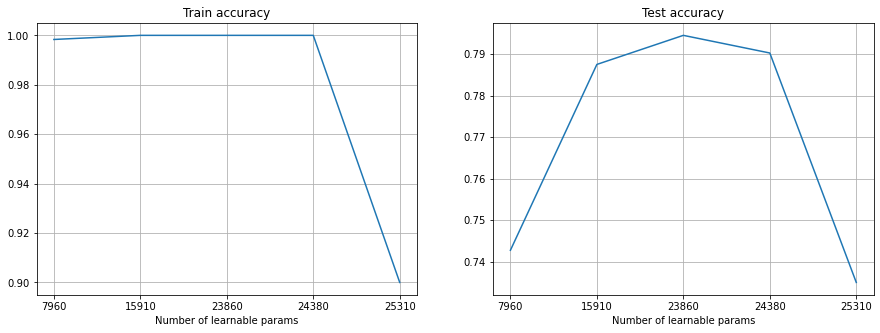

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1, hidden_layer_sizes=hl_size)
    
    mlp.fit(X_train, y_train)
   
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2

Increasing the number of learnable parameters returns a better and better training error due to the capability of the network to perform a more accurate fit until a certain point. After that the accuracy drops: I noticed a dependence between the accuracy trend and the training set size, then the accuracy drop could be due to the fact that the training set size is too small for this number of learnable parameters. 
Increasing too much the size of the NN leads to overfitting as we can infer from the test accuracy. This reaches a maximum for an hidden layer size of 30 and then it becomes a descent function of the number of learnable parameters.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

/home/giulia/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/giulia/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'batch_size': 480}
[0.01, 0.1]
Score with best parameters:
1.0


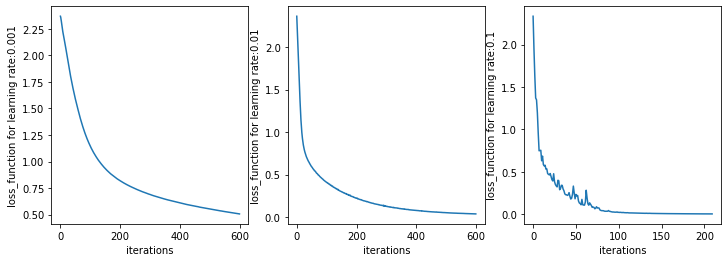

In [11]:
import matplotlib.pyplot as plt
import operator


#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = {}
parameters = mlp_kfold_batch.best_params_
batch_size = parameters['batch_size']

hidden_layer_sizes = mlp_kfold.best_params_['hidden_layer_sizes']
#print(hidden_layer_sizes)
#print(batch_size)
loss = []
fig, ax = plt.subplots(1,3, figsize=(12,4))

for i in range(len(lr_list)):
    learning_rate = lr_list[i]
    mlp = MLPClassifier(max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, batch_size= batch_size, hidden_layer_sizes=hidden_layer_sizes,
                    learning_rate_init=learning_rate, verbose=False )
    
    
    mlp.fit(X_train, y_train)
    scores[lr_list[i]]=mlp.score(X_train, y_train)
    loss.append(mlp.loss_)
    ax[i].plot(mlp.loss_curve_)
    ax[i].set_xlabel('iterations')
   # ax[i].set_xlim(0,600)
    ax[i].set_ylabel('loss_function for learning rate:'+ str(learning_rate))
    #ax[i].legend()


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
best_score = max(scores.values())
best_lr =  [key for key, val in scores.items() if val==best_score]
print(parameters)
print(best_lr)   

print("Score with best parameters:")
print(best_score)


In [12]:
print(loss)

[0.506653143193714, 0.03643882536484858, 0.005412096759975506]


In [13]:
print(scores)

{0.001: 0.8483333333333334, 0.01: 1.0, 0.1: 1.0}


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?


## [ANSWER TO QUESTION 3]
For the smallest learning rate:0.001 we get the slowest convergence but also the strongest stability. Increasing the learning rate results in a faster convergence but leads to instability (learning rate: 0.1) at the point that after 200 iterations the algorithm stops since it does not get better accuracy any more.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.030000
Best NN test error: 0.205500


/home/giulia/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[]

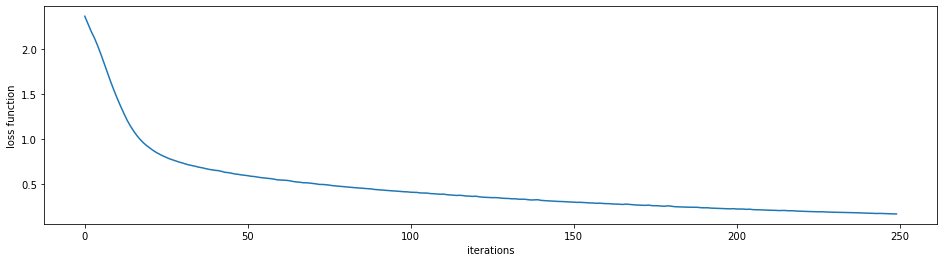

In [14]:
learning_rate = best_lr[0]

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, batch_size= batch_size, hidden_layer_sizes=hidden_layer_sizes,
                    learning_rate_init=learning_rate )

mlp.fit(X_train, y_train)
training_error = 1-mlp.score(X_train, y_train)
test_error = 1-mlp.score(X_test, y_test)
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(1,1, figsize=(16,4))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('iterations')
ax.set_ylabel('loss function')
plt.plot()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [15]:
#X = X[permutation]
#y = y[permutation]
# I removed permutation in order to avoid that the small training set and the large test set 
#had non-null intersection since after i will check the wrong classified items in the large test set

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [408 414 385 412 389 378 411 402 432 369]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [16]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID, batch_size= batch_size, hidden_layer_sizes=hidden_layer_sizes,
                    learning_rate_init=learning_rate )

mlp_large.fit(X_train, y_train)



print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

#ADD YOUR CODE
training_error_large = 1-mlp_large.score(X_train, y_train)
test_error_large = 1-mlp_large.score(X_test, y_test)


print ("NN training error: %f" % training_error_large)
print ("NN test error: %f" % test_error_large)


/home/giulia/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR NN

NN training error: 0.054500
NN test error: 0.163768


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

In [23]:
print ("Best NN training error, m=600: %f" % training_error)
print ("Best NN test error, m=600: %f" % test_error)


print ("NN training error, m=4000: %f" % training_error_large)
print ("NN test error, m=4000: %f" % test_error_large)

Best NN training error, m=600: 0.030000
Best NN test error, m=600: 0.205500
NN training error, m=4000: 0.054500
NN test error, m=4000: 0.163768


#### [ANSWER TO QUESTION 4]
Considering a bigger dataset leads to a bigger training error but reduces the test error leading so to better NN performances.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


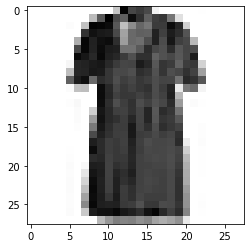

LABEL: 3
0 3 3


In [17]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

missclassified = -1
i=0

while missclassified==-1:
    if (NN_prediction[i] != y_test[i] and large_NN_prediction[i]== y_test[i]):
        missclassified= i
        plot_input(X_test,y_test,i)
        print(NN_prediction[i], large_NN_prediction[i], y_test[i])
    i += 1
    

        

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


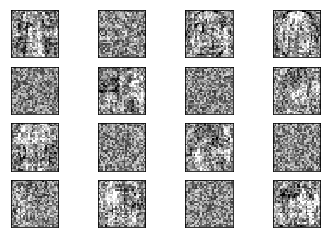

Weights with 4000 data points:


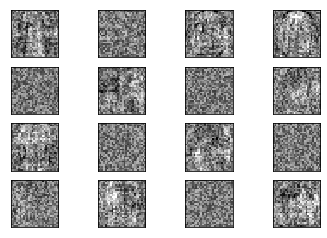

In [18]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.


##### [ANSWER TO QUESTION 5]
From the weights we could infer the image pixel structure. In particular, increasing the training set size we get a "smoother" weights trend.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [19]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
parameters ={'C': [50], 'gamma':[0.05]}
rbf_svm = SVC(kernel='rbf')
#rbf_svm_kfold = GridSearchCV(rbf_svm, parameters, cv=4, return_train_score=True)
rbf_svm.fit(X_train, y_train)
#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error =  1-rbf_svm.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1- rbf_svm.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.10040000000000004
Test score SVM:
0.15839999999999999


In [20]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1, max_iter=1000)
regL2.fit(X_train, y_train)
# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

reg_training_error = 1-regL2.score(X_train, y_train)
reg_test_error =  1- regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.030000
Test error (reg): 0.205500


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]
SVM achieves the best accuracy followed by NN and linear regression

In [21]:
print ("NN test error: %f" % test_error_large)
print("SVM test error: %f" %SVM_test_error)
print ("Test error (reg): %f" % reg_test_error)

NN test error: 0.163768
SVM test error: 0.158400
Test error (reg): 0.190400
